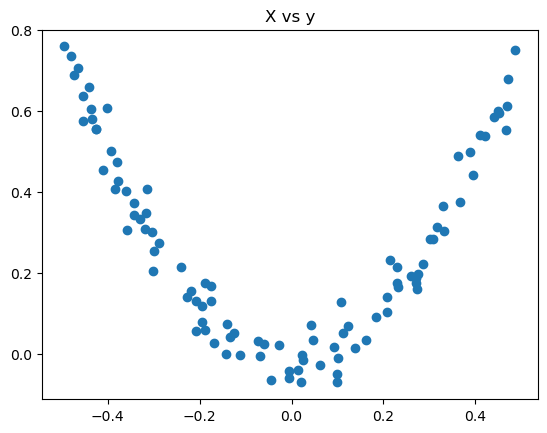

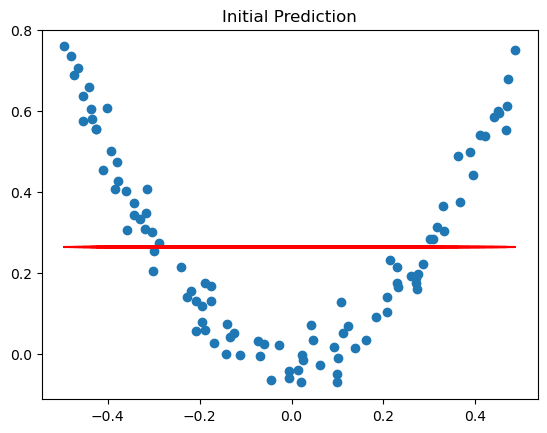

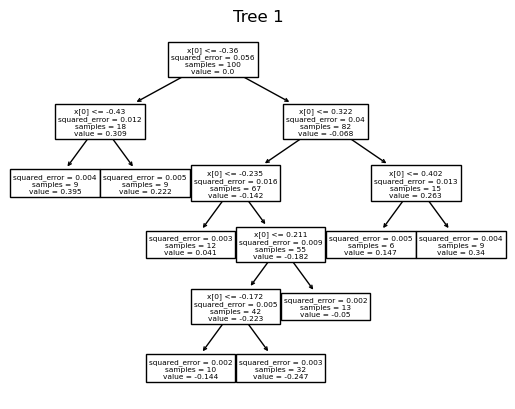

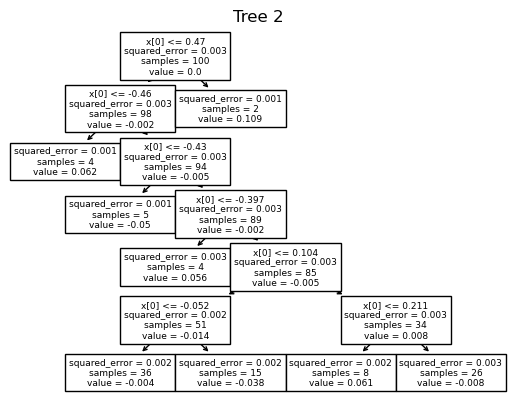

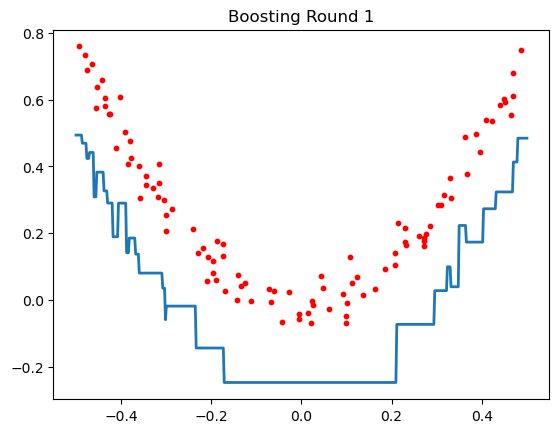

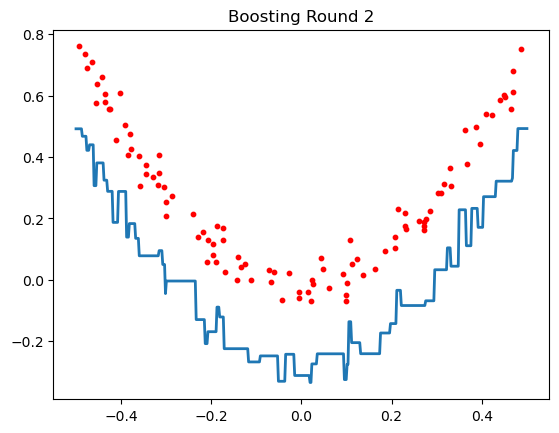

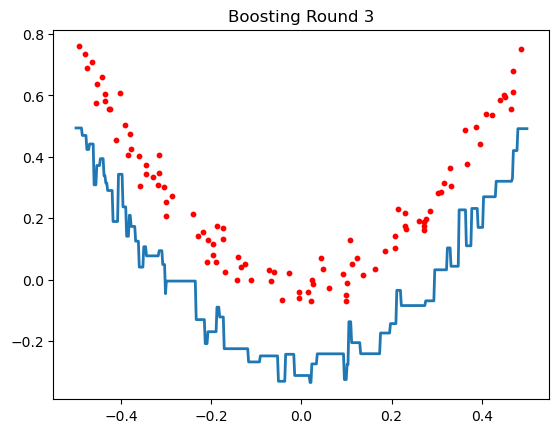

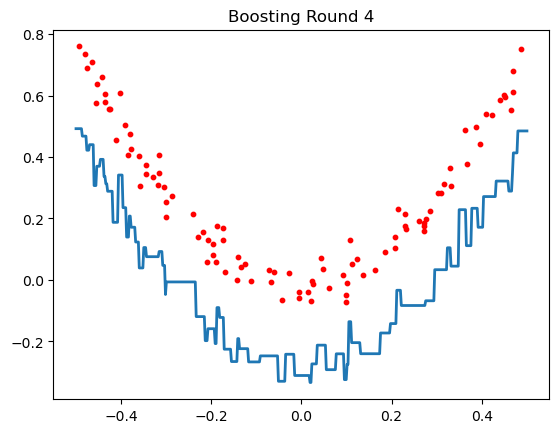

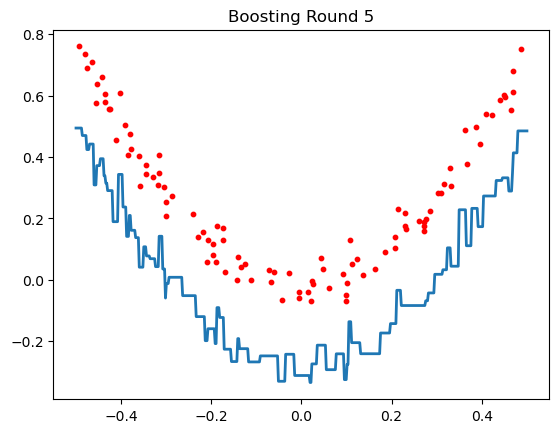

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)
df = pd.DataFrame({'X': X.reshape(100), 'y': y})
plt.scatter(df['X'], df['y'])
plt.title('X vs y')
plt.show()
df['pred1'] = df['y'].mean()
df['res1'] = df['y'] - df['pred1']
plt.scatter(df['X'], df['y'])
plt.plot(df['X'], df['pred1'], color='red')
plt.title('Initial Prediction')
plt.show()
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)
tree1.fit(df['X'].values.reshape(-1, 1), df['res1'].values)
df['pred2'] = df['pred1'] + tree1.predict(df['X'].values.reshape(100, 1))
df['res2'] = df['y'] - df['pred2']
plot_tree(tree1)
plt.title('Tree 1')
plt.show()
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)
tree2.fit(df['X'].values.reshape(-1, 1), df['res2'].values)
df['pred3'] = df['pred2'] + tree2.predict(df['X'].values.reshape(100, 1))
df['res3'] = df['y'] - df['pred3']
plot_tree(tree2)
plt.title('Tree 2')
plt.show()
def gradient_boost(X, y, n_estimators, learning_rate):
    trees = []
    predictions = np.full(y.shape, y.mean())
    for i in range(n_estimators):
        residuals = y - predictions
        tree = DecisionTreeRegressor(max_depth=5, random_state=42)
        tree.fit(X, residuals)
        predictions += learning_rate * tree.predict(X)
        trees.append(tree)
        x1 = np.linspace(-0.5, 0.5, 500)
        y_pred = sum(learning_rate * tree.predict(x1.reshape(-1, 1)) for tree in trees)
        plt.figure()
        plt.plot(x1, y_pred, linewidth=2)
        plt.scatter(X[:, 0], y, c='red', s=10)
        plt.title(f'Boosting Round {i + 1}')
        plt.show()
    return trees
trees = gradient_boost(X, y, n_estimators=5, learning_rate=1.0)